In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# Load dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Cek kolom
print(df.columns)
df.head()

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [16]:
# Disini saya menggunakan label numerik
# Ini proses ambil data dari label numerik
X = df[["Inches", "Ram", "Weight"]].copy()

# Preprocessing numerik
X["Ram"] = X["Ram"].str.replace("GB", "").astype(float)
X["Weight"] = X["Weight"].str.replace("kg", "").astype(float)
X["Inches"] = X["Inches"].astype(float)

y = df["Price_euros"].astype(float)

In [17]:
# Ini split data test sama data trainnya
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # Data test nya 20%, trainingnya 80%
)

In [18]:
# Deklarasi model yang digunakan. Ada 3 yaitu Linear Regresi, Random Forest, dan SVR
models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()),  # optional untuk RF
        ("rf", RandomForestRegressor(n_estimators=300, random_state=42))
    ]),
    "SVR": Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel="rbf", C=10, epsilon=0.1))
    ])
}

In [21]:
# Function untuk Evaluasi Model, pakai fungsi soalnya metodenya bukan cuman linear regresi
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}\n")

    return y_pred

In [22]:
# Ini buat nampung hasil perulangan
predictions = {}

# Ini perulangan untuk menyimpan hasil fungsi untuk setiap model, deklarasi model ada di models
for name, model in models.items():
    y_pred = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    predictions[name] = y_pred

Linear Regression
MAE : 341.81
MSE : 225444.48
RMSE: 474.81
R²  : 0.5561

Random Forest
MAE : 275.10
MSE : 176089.86
RMSE: 419.63
R²  : 0.6533

SVR
MAE : 351.24
MSE : 331410.36
RMSE: 575.68
R²  : 0.3475



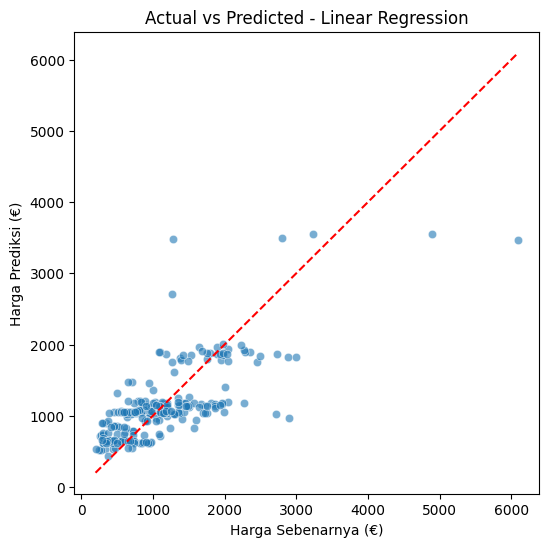

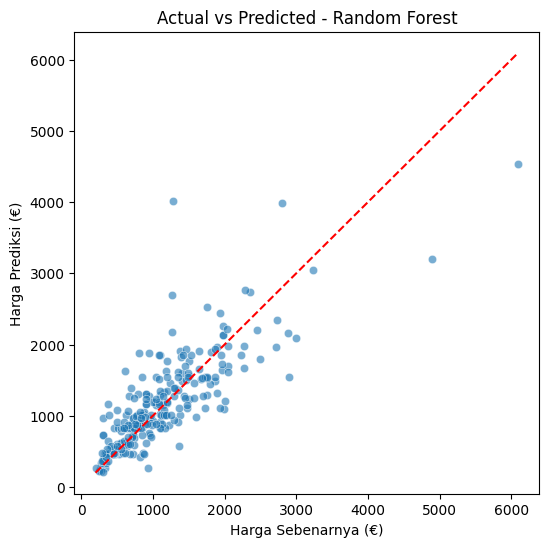

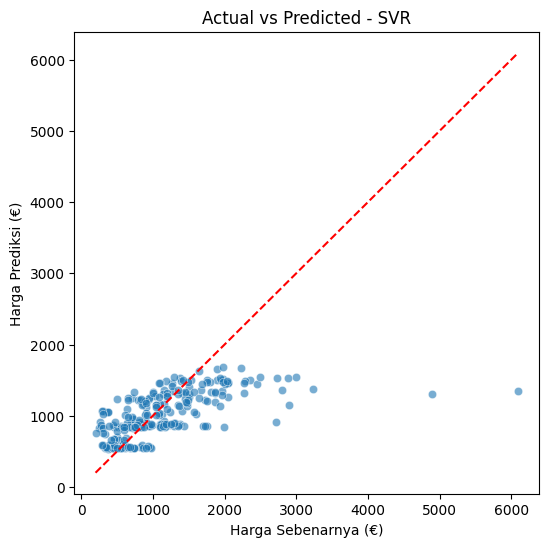

In [24]:
# Plot Hasil Harga Aktual dan Prediksi dari setiapa model (Linear Regresi, Random Forest, SVR)
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.xlabel("Harga Sebenarnya (€)")
    plt.ylabel("Harga Prediksi (€)")
    plt.title(title)
    plt.show()

for name, y_pred in predictions.items():
    plot_results(y_test, y_pred, f"Actual vs Predicted - {name}")

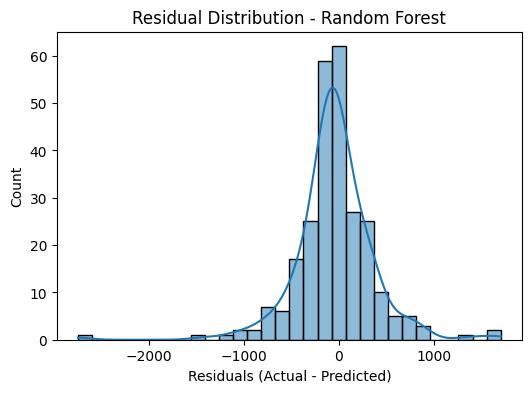

In [25]:
# Ini visualisasi yang menampilkan residual dari harga aktual dan prediksi.
residuals = y_test - predictions["Random Forest"]

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution - Random Forest")
plt.show()